#  Entregable 2 - Aprendizaje Automático II


***<p style="text-align:center;">Combinación de Estimadores: Adaboost & Gradient Boosting</p>***

En este cuaderno vamos a implementar Adaboost para clasificar datos bi-clase, y Gradient Boosting para un problema de regresión.

* **Adaboost**: Usaremos el `Breast cancer wisconsin (diagnostic) dataset`de `Sklearn` descrito en el Anexo del Entregable 1.
* **Gradient Boosting**: Usaremos datos generados a partir de filtros de Gabor ya vistos en cuadernos anteriores.

### Normas de Entrega

1. El formato de entrega será en una carpeta comprimida con nombre: {Iniciales de Nombre y Apellidos}_E2.zip, en Aula Virtual en la fecha señalada en la plataforma y comunicada en clase previamente.
    * Por ejemplo: Iván Ramírez Díaz ==> `IRD_E2.zip`
2. El contenido de dicha carpeta será:
    * Obligatorio: Notebook relleno del Entregable 2.
    * Opcional: Memoria (pdf), en caso de necesitar dar alguna explicación.
3. Antes de la entrega, se debe comprobar que el código completo funciona.
4. La entrega es individual.

### Evaluación

La práctica entregable tiene un peso global de 1/4 puntos (los 4 entregables son el 10% de la nota final).

La práctica entregable se calificará sobre 10 puntos. Las puntuaciones son las siguientes:

- **[Ejercicio 1]** Usa **Adaboost** de `Sklearn` para clasificar los datos de `Breast Cancer Dataset` y visualiza el rendimiento del modelo en función del número de estimadores. (2 puntos)

- **[Ejercicio 2]** Implementa **Adaboost** a partir de la estructura (clase) propuesta y compara el resultado de la clasificación con la implementación de `Sklearn`. (3 puntos)
- **[Ejercicio 3]**  Usa **Gradient Boosting** de `Sklearn` para regresar los datos del filtro de Gabor (2 puntos)
- **[Ejercicio 4]** Implementa **Gradient Boosting** a partir de la estructura (clase) propuesta y compara el resultado de la regresión con la implementación de `Sklearn`. (3 puntos)



# Adaboost

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train += np.random.randn(*X_train.shape)

## **[Ejercicio 1]**

 Usa **Adaboost** de `Sklearn` para clasificar los datos de `Breast Cancer Dataset` y visualiza el rendimiento del modelo en función del número de estimadores.

 <font color='red'>Ten en cuenta que, `AdaBoostClassifier` está en proceso de deprecación en favor de `SAMME`</font>.

In [ ]:
# Importar clasificador Adaboost y weaklearner

############################ Completar ############################
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Inicializar el clasificador base (árbol de decisión con profundidad máxima 1)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Inicializar el modelo AdaBoost con 50 clasificadores débiles
n_estimators = 50
ada_boost_sklearn = AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimators, algorithm='SAMME')

# Entrenar el modelo con los datos de entrenamiento
model= ada_boost_sklearn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_test = model.predict(X_test)

########################## Fin Completar ##########################

# Calcular precisión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

Precisión en el conjunto de prueba: 95.91%


Visualiza la mejora del clasificador en función del número de estimadores:

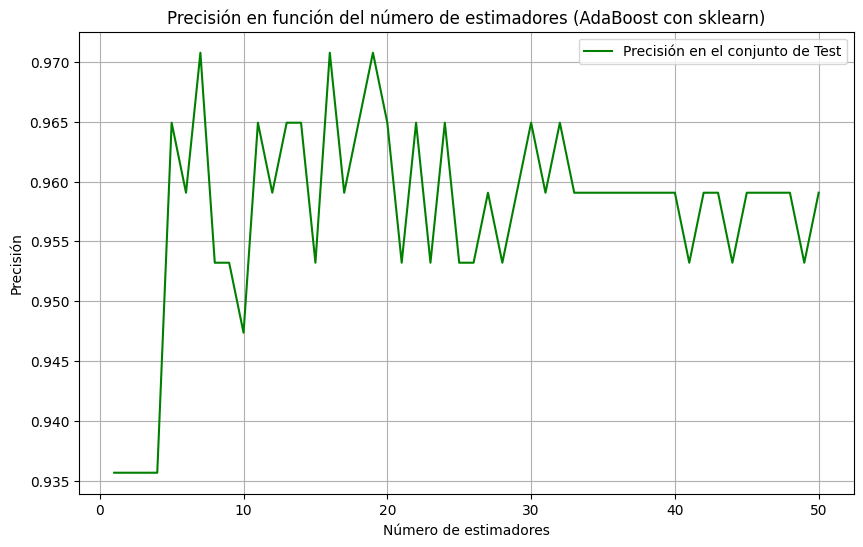

In [ ]:
# Visualizar el número de estimadores vs precisión
n_estimators_list = range(1, 50+1)
accuracies = []

############################ Completar ############################

# Evaluar el rendimiento del modelo para cada número de estimadores
for n in n_estimators_list:
    ada_boost_partial = AdaBoostClassifier(estimator=base_estimator, n_estimators=n, algorithm='SAMME')
    ada_boost_partial.fit(X_train, y_train)
    y_pred_partial = ada_boost_partial.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_partial))

########################## Fin Completar ##########################

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, label="Precisión en el conjunto de Test", color='green')
plt.xlabel('Número de estimadores')
plt.ylabel('Precisión')
plt.title("Precisión en función del número de estimadores (AdaBoost con sklearn)")
plt.legend()
plt.grid(True)
plt.show()

## **[Ejercicio 2]**

Implementa **Adaboost** a partir de la estructura (clase) propuesta y compara el resultado de la clasificación con la implementación de `Sklearn`.

Para ello, además de seguir la estructura siguiente, puedes apoyarte en la diapositiva 30 del Tema 3.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

class AdaBoostClassifierManual:
    def __init__(self, n_estimators=50, max_depth=1):
        """
        Inicializa el modelo AdaBoost para clasificación.

        :param n_estimators: Número de estimadores a usar.
        :param max_depth: Profundidad máxima de los árboles base.
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        """
        Ajusta el modelo a los datos de entrenamiento.

        :param X: Datos de entrenamiento.
        :param y: Vector de etiquetas de clase (-1, 1).
        """
        ############################ Completar ############################
        n_samples = len(X)

        # Inicializa los pesos uniformemente
        weights =  np.ones(n_samples)/n_samples

        for n in range(self.n_estimators):
            # Entrenar un clasificador débil con los pesos actuales
            model = DecisionTreeClassifier(max_depth=self.max_depth)    # Ten en cuenta que el clasificador débil debe admitir pesos para entrenar
            model.fit(X,y, sample_weight=weights)            # Fit
            y_pred = model.predict(X)

            # Calcular el error ponderado (solo en las predicciones incorrectas)
            I= (y_pred!=y)*1
            error =  np.sum(weights * I) # suma de errores ponderados


            # Calcular alpha (si error == 0, se para el ciclo)
            if error == 0:
                break
            alpha = math.log((1- error )/ error)

            self.models.append(model)
            self.alphas.append(alpha)

            # Actualizar los pesos para las muestras
            weights= weights * np.exp(alpha*I)

            #Normalizar
            weights= weights / np.sum(weights)

        ########################## Fin Completar ###########################

    def predict(self, X):
        """
        Realiza predicciones con el modelo ajustado.

        :param X: Matriz de características para predecir.
        :return: Predicciones del modelo (-1 o 1).
        """
        y_pred = np.zeros(X.shape[0])
        for model, alpha in zip(self.models, self.alphas):
            y_pred += alpha * model.predict(X)
        return np.sign(y_pred)


# IMPORTANTE: Adapta las etiquetas de {0, 1} a {-1, 1}
y_train = np.where(y_train==0, -1, 1)

y_test = np.where(y_test==0, -1, 1)

# Inicializar y entrenar el modelo AdaBoost
ada_boost_manual = AdaBoostClassifierManual()
#falta el fit
ada_boost_manual.fit(X_train, y_train)
# Hacer predicciones en el conjunto de prueba
y_pred_test = ada_boost_manual.predict(X_test)

# Calcular precisión en el conjunto de prueba
accuracy = np.mean(y_pred_test == y_test)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

Precisión en el conjunto de prueba: 95.91%


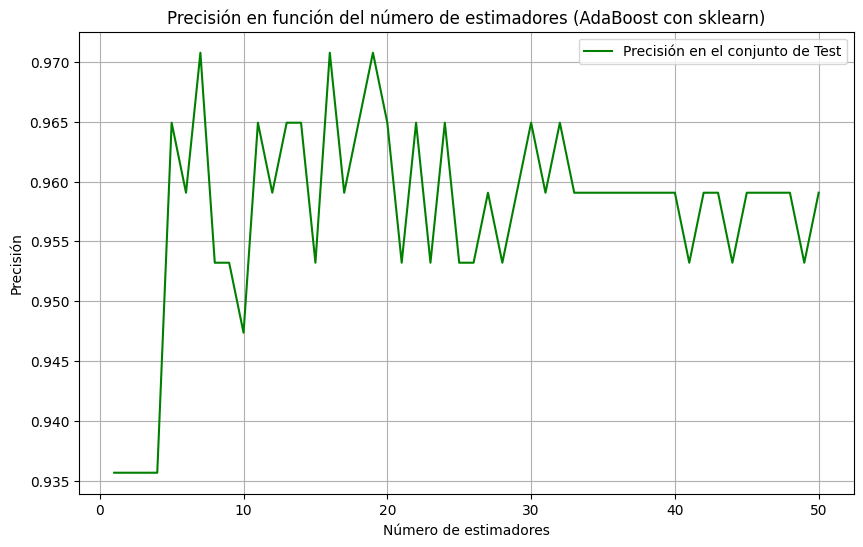

In [ ]:
# Visualizar el número de estimadores vs precisión
n_estimators_list = range(1, 50+1)
accuracies = []

############################ Completar ############################

# Evaluar el rendimiento del modelo para cada número de estimadores
for n in n_estimators_list:
    ada_boost_partial = AdaBoostClassifierManual(n_estimators= n)
    ada_boost_partial.fit(X_train, y_train)
    y_pred_partial = ada_boost_partial.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_partial))

########################## Fin Completar ##########################

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, label="Precisión en el conjunto de Test", color='green')
plt.xlabel('Número de estimadores')
plt.ylabel('Precisión')
plt.title("Precisión en función del número de estimadores (AdaBoost con sklearn)")
plt.legend()
plt.grid(True)
plt.show()

# Gradient Boosting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Creamos unos datos

In [ ]:
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]]).T
print(f'data.shape: {data.shape}')

data.shape: (30, 2)


Recordamos que estos datos venían muestreados de un filtro de Gabor con unos parámetros concretos. Estos parámetros son los que queríamos estimar en los cuadernos anteriores.

$$
y = \sin(\phi_0 + 0.06 \cdot \phi_1 \cdot x) \cdot \exp\left(-\frac{(\phi_0 + 0.06 \cdot \phi_1 \cdot x)^2}{32}\right) + \eta, \quad \eta \sim \mathcal{N}(\mu, \sigma)
$$

donde $ \phi = [\phi_0, \phi_1] $ son los parámetros del modelo que controlan la fase y la frecuencia.


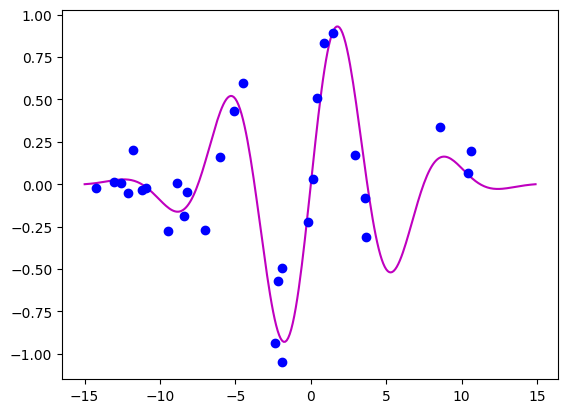

In [ ]:
def model(phi,x):
    sin_component = np.sin(phi[0] + 0.06 * phi[1] * x)
    gauss_component = np.exp(-(phi[0] + 0.06 * phi[1] * x) * (phi[0] + 0.06 * phi[1] * x) / 32)
    y_pred= sin_component * gauss_component
    return y_pred

# Visualización
x =  np.arange(-15,15,0.1)
y_model = model([0,14], x)
plt.plot(x, y_model,'m-')
plt.plot(data[:,0], data[:,1], 'bo')
plt.show()

## **[Ejercicio 3]**

Usa **Gradient Boosting** de `Sklearn` para regresar los datos del filtro de Gabor.


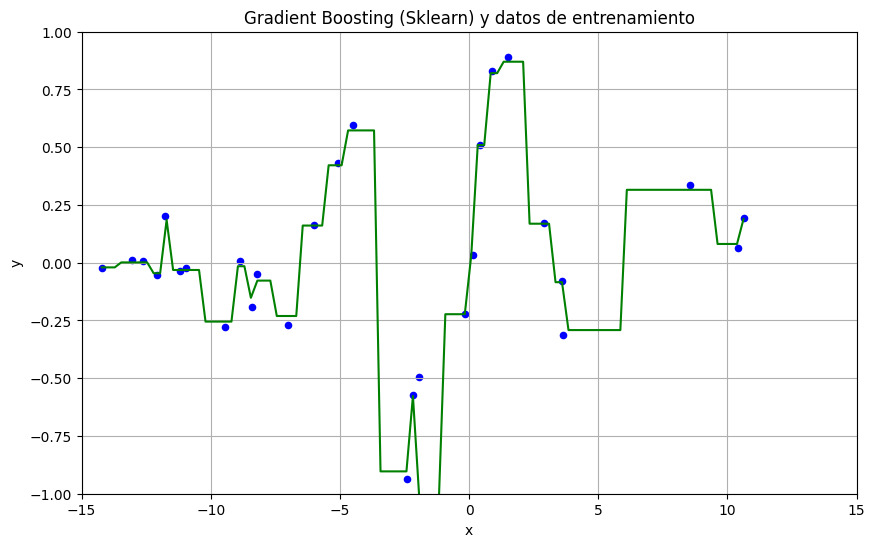

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# --------- DATOS ---------
# Variables de entrada (X) y salida (y)
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

# --------- MODELO DE SKLEARN: Gradient Boosting ---------

############################ Completar ############################

# 1. Entrenar el modelo con sklearn
gbr =GradientBoostingRegressor()
gbr.fit(X,y)

# 2. Conjunto de test (valores nuevos en los que queremos predecir)
x_test = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)

# 3. Hacer predicciones con el modelo de sklearn
y_pred_sklearn_test = gbr.predict(x_test)

########################## Fin Completar ###########################

# 4. Comparar las predicciones en el conjunto de test
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot de las predicciones del modelo de sklearn
ax.plot(x_test, y_pred_sklearn_test, label="Gradient Boosting (sklearn)", color='green')

# Scatter plot de los puntos de entrenamiento
ax.scatter(X, y, label="Train", color='blue', s=20)


# Establecemos los límites de los ejes en el rango x e y
ax.set_xlim([-15,15]);ax.set_ylim([-1,1])
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylabel('y')


ax.set_title("Gradient Boosting (Sklearn) y datos de entrenamiento")

plt.grid(True)

plt.show()


## **[Ejercicio 4]**

Implementa **Gradient Boosting** a partir de la estructura (clase) propuesta y compara el resultado de la regresión con la implementación de `Sklearn`.

Para ello, recordamos los pasos a seguir (diapositiva 61 - Tema 3):

1. **Inicialización**:
   - **General**:
     $$ f_0(x) = \gamma_0 = \arg\min_{\gamma} \sum_{i=1}^{N} L(y_i, \gamma) $$
   - **MSE**:
     $$ f_0(x) = \gamma_0 = \arg\min_{\gamma} \sum_{i=1}^{N} (y_i - \gamma)^2 $$
     **Solución**: Para MSE, la solución es la media de los valores de \( y \):
     $$ \gamma_0 = \frac{1}{N} \sum_{i=1}^{N} y_i $$

2. **Cálculo de los residuos**:
   - **General**:
     $$ r_{im} = -\left[\frac{\partial L(y_i, f_{m-1}(x_i))}{\partial f_{m-1}(x_i)}\right] $$
   - **MSE**:
     $$ r_{im} = y_i - f_{m-1}(x_i) $$
     **Solución**: Para MSE, los residuos son simplemente la diferencia entre los valores reales y las predicciones actuales.

3. **Ajuste del modelo**:
   - **General**:
     $$ f_m(x) = \arg\min_{f} \sum_{i=1}^{N} L(r_{im}, f(x_i)) $$
   - **MSE**:
     $$ f_m(x) = \arg\min_{f} \sum_{i=1}^{N} (r_{im} - f(x_i))^2 = \arg\min_{f} \sum_{i=1}^{N} (y_i - f_{m-1}(x_i) - f(x_i))^2 $$
     **Solución**: Para MSE, se entrena un modelo \( f_m(x) \) para predecir los residuos \( r_{im} \).

4. **Optimización del valor de $\gamma_m$**:
   - **General**:
     $$ \gamma_m = \arg\min_{\gamma} \sum_{i=1}^{N} L(y_i, f_{m-1}(x_i) + \gamma f_m(x_i)) $$
   - **MSE**:
     $$ \gamma_m = \arg\min_{\gamma} \sum_{i=1}^{N} (y_i - (f_{m-1}(x_i) + \gamma f_m(x_i)))^2 $$
     **Solución**: Para MSE, la solución es:
     $$ \gamma_m = \frac{\sum_{i=1}^{N} r_{im} f_m(x_i)}{\sum_{i=1}^{N} f_m(x_i)^2} $$

5. **Actualización**:
   
     $$ f_m(x) = f_{m-1}(x) + \alpha \gamma_m f_m(x) $$
   



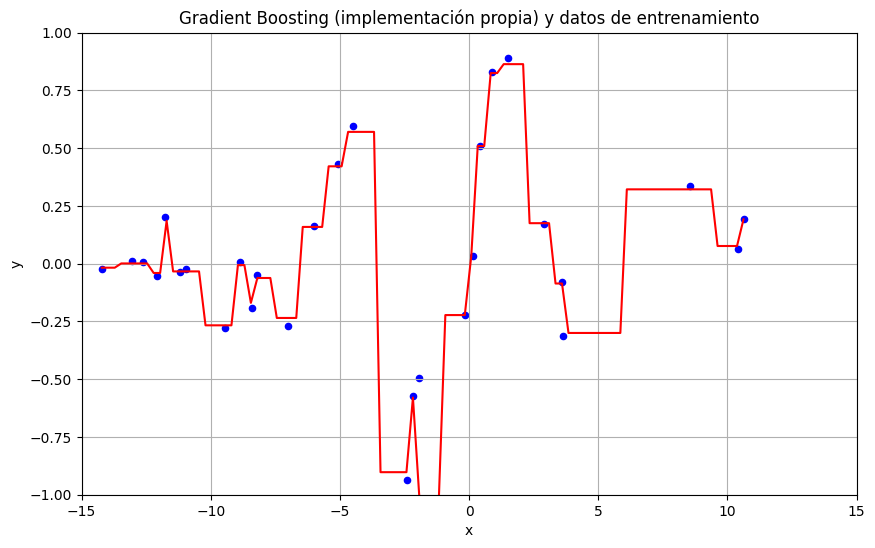

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class GradientBoostingManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, loss='mse'):
        """
        Inicializa el modelo de boosting.

        :param n_estimators: Número de iteraciones (árboles) que se entrenarán.
        :param learning_rate: Tasa de aprendizaje .
        :param max_depth: Profundidad máxima de los árboles de decisión (weak learners).
        :param loss: Función de pérdida, se usará 'mse' por defecto (error cuadrático medio).
        """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.loss = loss  # Solo soportaremos 'mse' en esta implementación
        self.trees = []  # Lista para almacenar los árboles (weak learners)
        self.gammas = []  # Lista para almacenar los multiplicadores gamma

    def _mse_gradient(self, y, y_pred):
        ############################ Completar ############################

        """Calcula el gradiente de la función de pérdida MSE."""
        return 2*(y - y_pred )   # Gradiente negativo para MSE
        ########################## Fin Completar ###########################

    def _mse_loss(self, y, y_pred):
        ############################ Completar ############################

        """Calcula el error cuadrático medio (MSE)."""
        return np.mean((y - y_pred) ** 2)

        ########################## Fin Completar ###########################

    def fit(self, X, y):
        """
        Entrena el modelo de Gradient Boosting manualmente.

        :param X: Matriz de características (features).
        :param y: Vector de salida (target).
        """
        ############################ Completar ############################

        # Inicializar modelo (y_pred) con un valor constante (la media de los valores de y)

        self.initial_value = np.mean(y) # guarda esta inicialización
        # inicializa el vector de predicciones al valor anterior (cada componente)

        y_pred = np.ones(y.shape) * self.initial_value
        # O y_pred=np.full(y.shape, self.initial_value)

        # Iterar para crear n_estimators árboles
        for m in range(self.n_estimators):
            # 1. Calcular los pseudo-residuos (gradiente negativo de la función de pérdida)
            residuals = self._mse_gradient(y, y_pred)

            # 2. Entrenar un nuevo árbol en los residuos
            tree = DecisionTreeRegressor(max_depth= self.max_depth)
            tree.fit(X, residuals)

            self.trees.append(tree)

            # 3. Calcular la predicción del nuevo árbol
            tree_pred = tree.predict(X)

            # 4. Optimizar el valor de gamma para la iteración actual
            gamma_m = self._compute_gamma(y,y_pred,tree_pred)
            self.gammas.append(gamma_m)

            # 5. Actualizar las predicciones del modelo sumando el escalado de gamma_m y el árbol actual
            y_pred += self.learning_rate * gamma_m * tree.predict(X)

        ########################## Fin Completar ###########################

    def _compute_gamma(self, y, y_pred, tree_pred):
        """
        Optimiza el valor de gamma_m para minimizar la función de pérdida en la iteración actual.

        :param y: Valores reales.
        :param y_pred: Predicciones actuales.
        :param tree_pred: Predicciones del nuevo árbol.
        :return: El valor óptimo de gamma_m.
        """
        ############################ Completar ############################

        # Para MSE, gamma se optimiza mediante la fórmula cerrada del enunciado
        numerator = np.sum(self._mse_gradient(y, y_pred)* tree_pred)
        denominator =np.sum(tree_pred**2)

        ########################## Fin Completar ###########################

        if denominator == 0:
            return 0  # Si el denominador es cero, devolver gamma = 0 para evitar división por cero

        return numerator / denominator

    def predict(self, X):
        """
        Realiza predicciones utilizando el modelo entrenado.

        :param X: Matriz de características (features) sobre las que se quiere predecir.
        :return: Predicciones del modelo.
        """
        ############################ Completar ############################

        # Inicializamos las predicciones con el valor constante inicial
        y_pred = np.ones(X.shape[0]) * self.initial_value

        # Sumamos las contribuciones de cada árbol multiplicadas por su gamma correspondiente
        for tree, gamma in zip(self.trees, self.gammas):
            y_pred += self.learning_rate * gamma * tree.predict(X)


        ########################## Fin Completar ###########################
        return y_pred



# Crear el modelo y entrenarlo
gbm_manual = GradientBoostingManual(n_estimators=50, learning_rate=0.1, max_depth=3)
gbm_manual.fit(X, y)

# Predecir en el conjunto de test
x_test = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
y_pred_manual_test = gbm_manual.predict(x_test)

# --------- GRÁFICO PARA VISUALIZAR ---------
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot de las predicciones del modelo
ax.plot(x_test, y_pred_manual_test, label="Gradient Boosting (implementación propia)", color='red')

# Scatter plot de los puntos de entrenamiento
ax.scatter(X, y, label="Train", color='blue', s=20)


# Establecemos los límites de los ejes en el rango x e y
ax.set_xlim([-15,15]);ax.set_ylim([-1,1])
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylabel('y')


ax.set_title("Gradient Boosting (implementación propia) y datos de entrenamiento")

plt.grid(True)

plt.show()
